# Libraries and the usual

In [1]:
import pandas as pd
import numpy as np
import datetime

#bold font and set font color for easier readibility
def printf(message, newLine = True):
    out = '\x1b[0;30;43m' + '\033[1m' + message + '\033[0m' + '\x1b[0m'
    print(out) if newLine else print(out, end='')
    
printf("Printout like these are part of the author's narrative")

#dynamically resize notebook width to screensize for easier visibility in presentation
#RUN THIS BEFORE PRESENTATION
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

pd.options.display.float_format = '{:,.3f}'.format

Printout like these are part of the author's narrative


In [2]:
#load data file
df = pd.read_csv('Data\electronics_processed.csv', encoding = "ISO-8859-1")
df['date'] = pd.to_datetime(df.date)
printf("\nSample top 5 rows of data :\n")
df.head()


Sample top 5 rows of data :



,id,prices_merchant,brand,categories,name,primarycategories,shipping_provided,shipping_free,shipping_charges,weight_grams,date,est_price,depreciation,month,year
0,AVphzgbJLJeJML43fA0o,bestbuy.com,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,0,0,0.000,"14,877.820",2017-03-03,104.990,0.000,3,2017
1,AVphzgbJLJeJML43fA0o,bestbuy.com,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,0,0,0.000,"14,877.820",2017-03-04,104.990,0.000,3,2017
2,AVphzgbJLJeJML43fA0o,bestbuy.com,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,0,0,0.000,"14,877.820",2017-03-10,104.990,0.000,3,2017
3,AVphzgbJLJeJML43fA0o,bestbuy.com,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Electronics,0,0,0.000,"14,877.820",2017-03-30,104.990,0.000,3,2017
4,AVpgMuGwLJeJML43KY_c,walmart.com,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",Boytone - 2500W 2.1-Ch. Home Theater System - ...,Electronics,1,1,0.000,"6,350.290",2017-12-14,66.995,0.000,12,2017


# Statistics

In [3]:
printf("Note the relationship between estimated price and weight")
df.corr()

Note the relationship between estimated price and weight


,shipping_provided,shipping_free,shipping_charges,weight_grams,est_price,depreciation,month,year
shipping_provided,1.000,0.989,0.037,0.121,0.134,0.055,0.256,0.224
shipping_free,0.989,1.000,-0.037,0.123,0.137,0.056,0.256,0.225
shipping_charges,0.037,-0.037,1.000,0.042,0.020,-0.002,0.000,-0.007
weight_grams,0.121,0.123,0.042,1.000,0.467,0.118,-0.004,0.026
est_price,0.134,0.137,0.020,0.467,1.000,0.188,-0.001,0.050
depreciation,0.055,0.056,-0.002,0.118,0.188,1.000,0.007,0.049
month,0.256,0.256,0.000,-0.004,-0.001,0.007,1.000,-0.442
year,0.224,0.225,-0.007,0.026,0.050,0.049,-0.442,1.000


Not much insight can be gleaned here


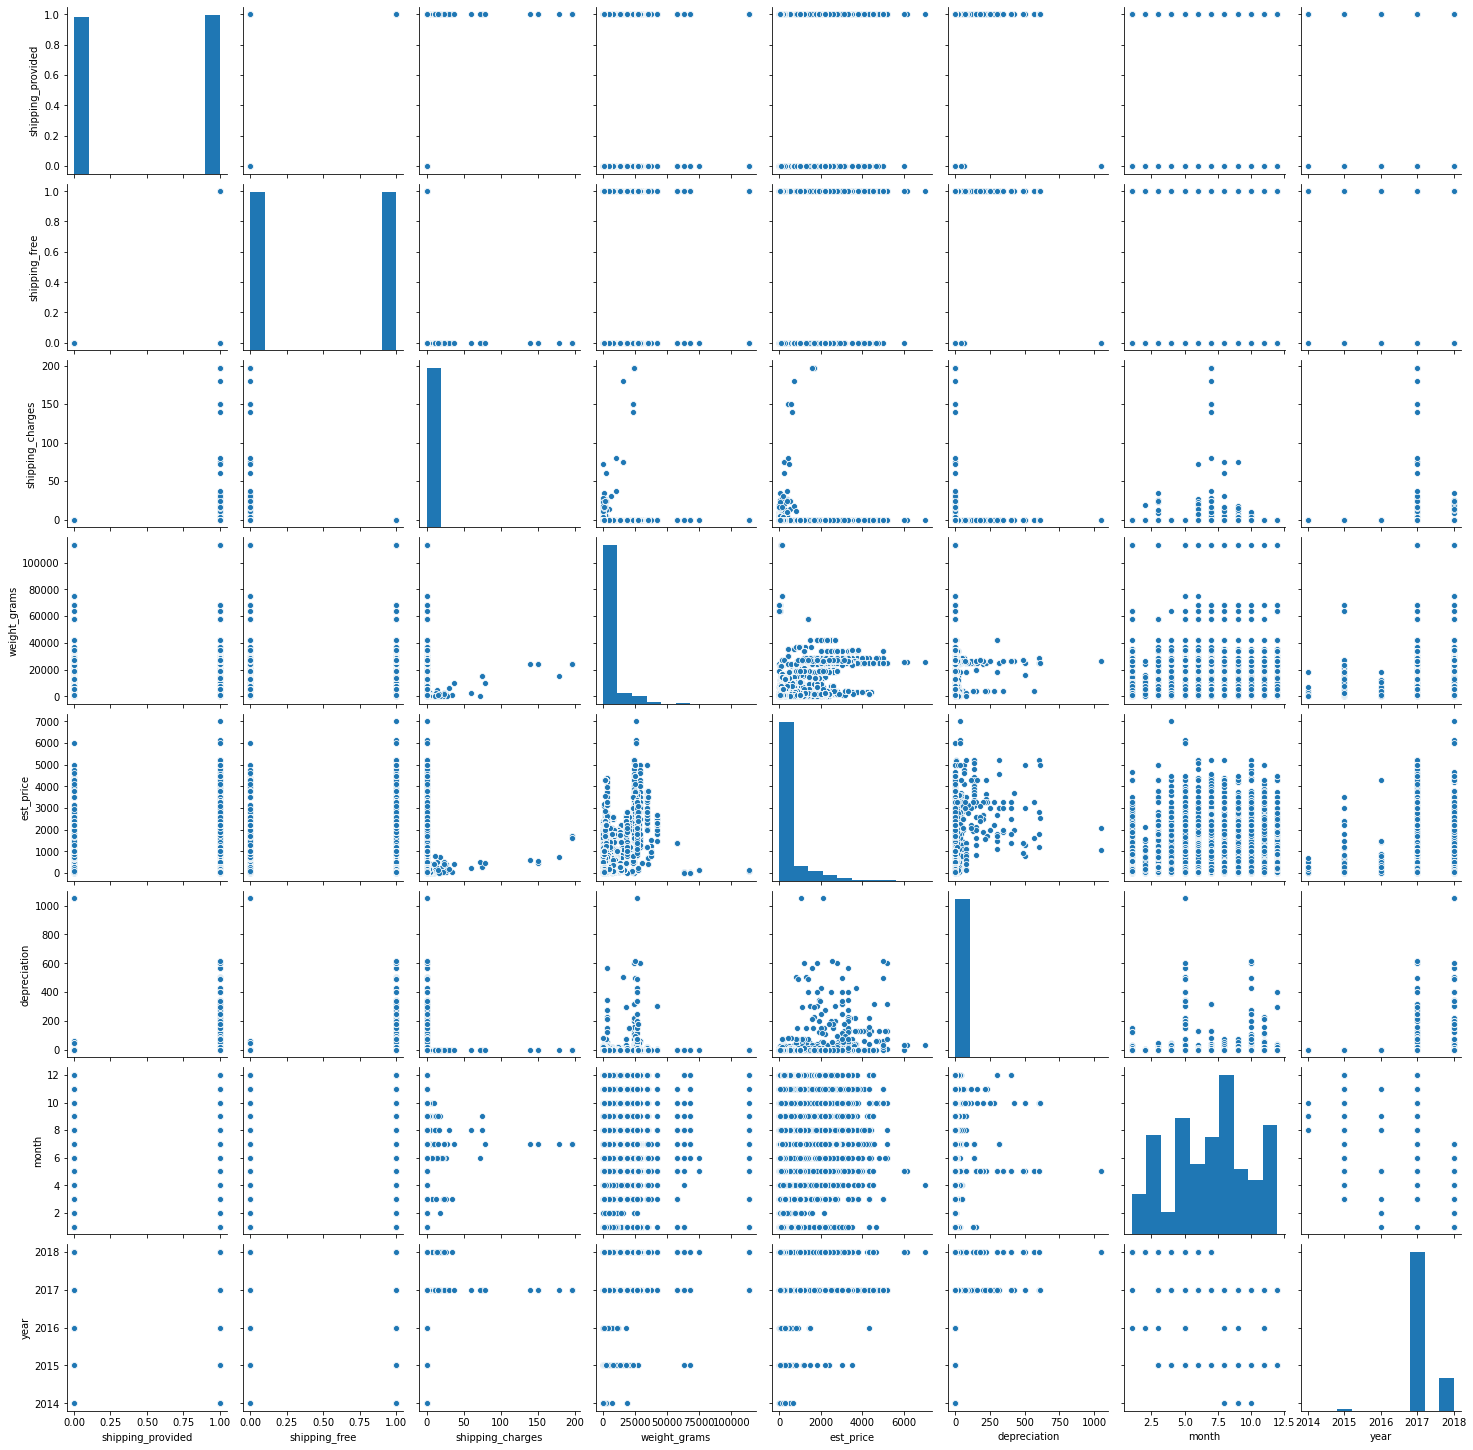

In [4]:
import seaborn as sns
printf("Not much insight can be gleaned here")
sns.pairplot(df);

# Exploratory Data Analysis

## Top merchants

In [5]:
#shorten merchants names for easier visualisation
df.prices_merchant = df.prices_merchant.str.replace("bestbuy.com", "bestbuy")
df.prices_merchant = df.prices_merchant.str.replace("bhphotovideo.com", "bhp")
df.prices_merchant = df.prices_merchant.str.replace("walmart.com", "walmart")

In [6]:
topByItems = df.groupby('prices_merchant')['id'].count().sort_values(ascending=False)
topByItems.to_csv(r"Data\r1c1 - MerchantsItems.csv")

printf("Top merchants by items")
topByItems

Top merchants by items


prices_merchant
bestbuy    10796
bhp         6068
others      4044
walmart     1278
Name: id, dtype: int64

In [7]:
topByValue = df.groupby('prices_merchant')['est_price'].sum().sort_values(ascending=False)
topByValue.to_csv(r'Data\r1c2 - MerchantsValue.csv')

printf("Top merchants by value")
topByValue

Top merchants by value


prices_merchant
bestbuy   4,251,508.020
bhp       3,031,453.960
others    2,538,939.780
walmart     606,192.603
Name: est_price, dtype: float64

## Items sold with shipping

In [8]:
#replace encoding for easier data visualisation
df.shipping_provided = df.shipping_provided.replace(0, "no")
df.shipping_provided = df.shipping_provided.replace(1, "yes")

In [9]:
shippingItems = df.groupby('shipping_provided')['id'].count()
shippingItems.to_csv(r'Data\r5c1 - ShippingItems.csv')

printf("Number of items sold with / without shipping specified")
shippingItems

Number of items sold with / without shipping specified


shipping_provided
no     10998
yes    11188
Name: id, dtype: int64

In [10]:
shippingValue = df.groupby('shipping_provided')['est_price'].sum()
shippingValue.to_csv(r'Data\r5c2 - ShippingValue.csv')

printf("Value of items sold with / without shipping specified")
shippingValue

Value of items sold with / without shipping specified


shipping_provided
no    4,121,641.370
yes   6,306,452.993
Name: est_price, dtype: float64

## Most expensive items (by merchants)

In [11]:
most_expensive = df.groupby('prices_merchant')['est_price'].max().sort_values(ascending=False)
most_expensive.to_csv(r'Data\r6c1 - Xitems.csv')

printf("Most expensive item sold")
most_expensive

Most expensive item sold


prices_merchant
walmart   6,999.990
bestbuy   5,999.990
others    4,999.990
bhp       4,496.990
Name: est_price, dtype: float64

## Samsung TVs (by merchants)

In [12]:
df.name = df.name.str.replace('"', "")
samsung = df.query("brand == 'Samsung'")
samsung_tv = samsung[samsung['name'].str.contains("TV", na = False) & samsung['name'].str.contains("Class", na = False)
                     & samsung['name'].str.contains("4K", na = False) & samsung['name'].str.contains("Samsung", na = False)] 
samsung_tv_grouped = samsung_tv.groupby(['name', 'prices_merchant'])['est_price'].max()

printf("Samsung TVs")
samsung_tv_grouped

Samsung TVs


name                                                                                         prices_merchant
Samsung - 49 Class - LED - MU6290 Series - 2160p - Smart - 4K Ultra HD TV with HDR           bestbuy             599.990
                                                                                             bhp                 597.990
                                                                                             others              599.990
                                                                                             walmart             597.990
Samsung - 49 Class - LED - Q6F Series - 2160p - Smart - 4K UHD TV with HDR                   bestbuy             899.990
                                                                                             bhp               1,299.990
                                                                                             others            1,297.990
                                            

In [13]:
#drop items that are not sold by all 4 merchants
samsung_tv_grouped.drop(labels=['Samsung 55 Class 4K (2160P) Smart LED TV (UN55KU7000)', 
                                'Samsung - 65 Class - LED - Q7F Series - 2160p - Smart - 4K UHD TV with HDR',
                                'Samsung - 65 Class - LED - Curved - MU7500 Series - 2160p - Smart - 4K UHD TV with HDR', 
                                'Samsung - 55 Class - LED - Q8F Series - 2160p - Smart - 4K UHD TV with HDR'], inplace=True)

In [14]:
#easy way to convert series for more opeations
samsung_tv_grouped.to_csv(r'Data\temp.csv')
samsung_tv_grouped_df = pd.read_csv(r'Data\temp.csv', encoding = "ISO-8859-1")

#shorten item name for easier presentation in chart
samsung_tv_grouped_df.name = samsung_tv_grouped_df.name.str.replace("Samsung", "")
samsung_tv_grouped_df.name = samsung_tv_grouped_df.name.str.replace("LED", "") 
samsung_tv_grouped_df.name = samsung_tv_grouped_df.name.str.replace("4K", "")
samsung_tv_grouped_df.name = samsung_tv_grouped_df.name.str.replace("Smart", "")
samsung_tv_grouped_df.name = samsung_tv_grouped_df.name.str.replace("TV with HDR", "")
samsung_tv_grouped_df.name = samsung_tv_grouped_df.name.str.replace("2160p", "")
samsung_tv_grouped_df.name = samsung_tv_grouped_df.name.str.replace("UHD", "")
samsung_tv_grouped_df.name = samsung_tv_grouped_df.name.str.replace("Ultra HD", "")
samsung_tv_grouped_df.name = samsung_tv_grouped_df.name.str.replace("-", "")
samsung_tv_grouped_df.name = samsung_tv_grouped_df.name.str.replace("    ", " ")
samsung_tv_grouped_df.name = samsung_tv_grouped_df.name.str.strip()

samsung_tv_grouped_df.to_csv(r'Data\r3c1 - SamsungTV.csv', index = False)
samsung_tv_grouped_df

,name,prices_merchant,est_price
0,49 Class MU6290 Series,bestbuy,599.990
1,49 Class MU6290 Series,bhp,597.990
2,49 Class MU6290 Series,others,599.990
3,49 Class MU6290 Series,walmart,597.990
4,49 Class Q6F Series,bestbuy,899.990
5,49 Class Q6F Series,bhp,"1,299.990"
6,49 Class Q6F Series,others,"1,297.990"
7,49 Class Q6F Series,walmart,"1,299.990"
8,55 Class Curved MU6490 Series,bestbuy,799.990
9,55 Class Curved MU6490 Series,bhp,"1,197.990"


## Macbook Pro and iMac (by merchants)

In [15]:
mac = df[df['name'].str.contains("MacBook", na = False) | df['name'].str.contains("iMac", na = False) ]
mac_grouped = mac.groupby(['name', 'prices_merchant'])['est_price'].max()

printf("Macbook and iMac")
mac_grouped

Macbook and iMac


name                                                                                                            prices_merchant
12 MacBook (Mid 2017, Gold)                                                                                     bestbuy           1,599.990
                                                                                                                bhp               1,569.000
15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)                                                         bestbuy           2,799.990
                                                                                                                bhp               2,878.000
                                                                                                                others            2,604.690
                                                                                                                walmart           3,544.540
21.5 iMac with Retina 4K Display

In [16]:
#concentrate on 4 items
mac_grouped.drop(labels=['12 MacBook (Mid 2017, Gold)',
                '27 iMac with Retina 5K Display (Mid 2017)',
                'Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 GB flash storage - English', 
                'SeeThru Hard Shell Case for 13 MacBook Pro (Clear)',
                'Vectros Bumper for 13 MacBook Pro Retina (Black)', 
                'kate spade new york - Glitter Sleeve for 13 Apple?? MacBook?? - Rose Gold'], inplace=True)

In [17]:
#easy way to convert series for more opeations
mac_grouped.to_csv(r'Data\temp.csv')
mac_grouped_df = pd.read_csv(r'Data\temp.csv', encoding = "ISO-8859-1")

#shorten item name for easier presentation in chart
mac_grouped_df.name = mac_grouped_df.name.str.replace("Apple", "")
mac_grouped_df.name = mac_grouped_df.name.str.replace("-", "")
#v.impt cos JS in the web based visualisation will take it as another column in str.split
mac_grouped_df.name = mac_grouped_df.name.str.replace(",", "") 
mac_grouped_df.name = mac_grouped_df.name.str.replace("  ", " ")
mac_grouped_df.name = mac_grouped_df.name.str.strip()

#fill up 1 missing row
mac_grouped_df.loc[15] = ["Apple MacBook Pro with Touch Bar - 13.3 - Core i5 - 8 GB RAM - 512 GB SSD - English", "walmart", 0]

mac_grouped_df.to_csv(r'Data\r3c2 - Apple.csv', index = False)
mac_grouped_df

,name,prices_merchant,est_price
0,15.4 MacBook Pro with Touch Bar (Late 2016 Spa...,bestbuy,"2,799.990"
1,15.4 MacBook Pro with Touch Bar (Late 2016 Spa...,bhp,"2,878.000"
2,15.4 MacBook Pro with Touch Bar (Late 2016 Spa...,others,"2,604.690"
3,15.4 MacBook Pro with Touch Bar (Late 2016 Spa...,walmart,"3,544.540"
4,21.5 iMac with Retina 4K Display (Mid 2017),bestbuy,"1,499.990"
5,21.5 iMac with Retina 4K Display (Mid 2017),bhp,"1,499.000"
6,21.5 iMac with Retina 4K Display (Mid 2017),others,"2,085.390"
7,21.5 iMac with Retina 4K Display (Mid 2017),walmart,"1,461.650"
8,MacBook Pro?? 13 Display Intel Core i5 8 GB Me...,bestbuy,"1,999.990"
9,MacBook Pro?? 13 Display Intel Core i5 8 GB Me...,bhp,"1,999.000"


## Compare price movement (for items in bestbuy)

In [18]:
bestbuy = df.query("prices_merchant == 'bestbuy'")
bestbuy = bestbuy[['name', 'date', 'est_price']]
bestbuy = bestbuy.sort_values(["name", "date"], ascending = (True, True))
bestbuy.reset_index(inplace=True)
#bestbuy.index = np.arange(1, len(bestbuy) + 1)
bestbuy.drop(['index'], axis=1, inplace=True)

printf("Selected data that we'll be using:")
bestbuy.head()

Selected data that we'll be using:


,name,date,est_price
0,1080p Day/Night PTZ Speed Dome Camera with 5 t...,2017-07-26,478.990
1,1080p Day/Night PTZ Speed Dome Camera with 5 t...,2017-07-31,478.990
2,1080p Day/Night PTZ Speed Dome Camera with 5 t...,2017-08-01,478.990
3,1080p Day/Night PTZ Speed Dome Camera with 5 t...,2017-08-12,478.990
4,1080p Day/Night PTZ Speed Dome Camera with 5 t...,2017-08-22,478.990


In [19]:
bestbuyColumnsList = ['name', 'date', 'earliest_price', 'last_price']
data = []
i = 0
sameRow = True

while i < len(bestbuy):
    sameRow = True
    thisRow = bestbuy.iloc[i].values
    j = 1

    while sameRow:
        if (i+j) < len(bestbuy): #check last row of df
            if bestbuy.name.iloc[i] == bestbuy.name.iloc[i+j]:
                if (i+j) == len(bestbuy) - 1: #if last row of df is same, insert
                    thisRow = np.append(thisRow, bestbuy.est_price.iloc[i+j])
                    data.append(thisRow)
                j += 1
            else:
                thisRow = np.append(thisRow, bestbuy.est_price.iloc[i+j])
                data.append(thisRow)
                i = i + j
                sameRow = False
        else:
            i = i + j
            sameRow = False

bestbuy_new = pd.DataFrame(data, columns = bestbuyColumnsList)

In [20]:
bestbuy_new['price_change_percent'] = (bestbuy_new.last_price - bestbuy_new.earliest_price) / bestbuy_new.earliest_price
bestbuy_new = bestbuy_new.sort_values("price_change_percent", ascending = False)
printf("Price variability for items in bestbuy:")
bestbuy_new

Price variability for items in bestbuy:


,name,date,earliest_price,last_price,price_change_percent
83,Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 ...,2017-03-04,1.000,"1,999.990","1,998.990"
193,Details About Alienware 13 R3 Aw13r3/13.3 Fhd/...,2017-03-04,1.000,"1,899.990","1,898.990"
760,XB550AP EXTRA BASS Headphones (Black),2017-05-01,59.990,"4,999.990",82.347
6,14 Checkpoint Friendly Laptop Case,2017-03-04,33.990,"2,799.990",81.377
620,Sennheiser - CX 3.00 Earbud Headphones - Red,2015-05-04,35.990,"2,199.990",60.128
...,...,...,...,...,...
759,X900F-Series 75-Class HDR UHD Smart LED TV,2018-05-25,"3,499.990",59.990,-0.983
82,Apple MNF72LL/A 61W USB-C Power Adapter,2017-03-04,69.000,1.000,-0.986
694,SunBriteTV - Veranda Series - 43 Class - LED -...,2017-03-04,"1,499.980",12.990,-0.991
84,Apple MacBook Pro with Touch Bar - 13.3 - Core...,2017-03-03,"1,999.990",12.450,-0.994


In [21]:
printf("Dropping the first 2 rows since it is obviously outliers or bad data:")
bestbuy_new.drop([83,193], inplace=True)

Dropping the first 2 rows since it is obviously outliers or bad data:


In [22]:
printf("Restricting to % change more than 20:")
bestbuy_new = bestbuy_new.query("price_change_percent>20")

Restricting to % change more than 20:


In [23]:
#v.impt cos JS in the web based visualisation will take it as another column in str.split
bestbuy_new.name = bestbuy_new.name.str.replace(",", "") 
#drop the un-needed columns
bestbuy_new.drop(['date', 'earliest_price', 'last_price'], axis=1, inplace=True)
bestbuy_new.to_csv(r'Data\r4 - PriceChange.csv', float_format = "%0.1f", index = False)

C:\Users\markc\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\markc\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Seasonality

In [24]:
printf("Focusing on iMac/Macbook and headphones for the last 2 years:")
season = df[ df['name'].str.contains("MacBook", na = False) | df['name'].str.contains("iMac", na = False) | 
        df['name'].str.contains("Headphone", na = False) ]
season = season.query("year == 2017 | year == 2018" )
season = season[['name', 'est_price', 'month']]
season

Focusing on iMac/Macbook and headphones for the last 2 years:


,name,est_price,month
330,Air-Fi Runaway AF32 Stereo Bluetooth Wireless ...,49.000,8
331,Air-Fi Runaway AF32 Stereo Bluetooth Wireless ...,49.000,8
332,Air-Fi Runaway AF32 Stereo Bluetooth Wireless ...,49.000,8
333,Air-Fi Runaway AF32 Stereo Bluetooth Wireless ...,49.000,11
334,Air-Fi Runaway AF32 Stereo Bluetooth Wireless ...,49.000,12
...,...,...,...
22163,V-MODA - Crossfade Wireless Headphones - Gunme...,199.990,1
22164,V-MODA - Crossfade Wireless Headphones - Gunme...,199.990,4
22165,V-MODA - Crossfade Wireless Headphones - Gunme...,199.990,5
22166,V-MODA - Crossfade Wireless Headphones - Gunme...,199.990,6


In [25]:
#simplify item name
season.name = season.name.apply(lambda x: 'Headphone' if 'Headphone' in x else 'iMac and MacBook')

In [26]:
seasonvalue_grouped = season.groupby(['month', 'name'])['est_price'].sum()
seasonvalue_grouped.to_csv(r'Data\temp.csv', float_format = "%0.0f")

printf("Sales by month for the items")
seasonvalue_grouped

Sales by month for the items


month  name            
1      Headphone           32,903.567
       iMac and MacBook    25,187.430
2      Headphone              446.990
       iMac and MacBook     1,497.990
3      Headphone           55,703.585
       iMac and MacBook    84,138.580
4      Headphone           15,620.650
       iMac and MacBook    32,293.120
5      Headphone           62,860.710
       iMac and MacBook   103,294.450
6      Headphone           49,214.142
       iMac and MacBook    45,223.770
7      Headphone           45,103.664
       iMac and MacBook    83,808.560
8      Headphone           94,519.940
       iMac and MacBook   167,060.690
9      Headphone           34,509.743
       iMac and MacBook    34,999.190
10     Headphone           31,673.212
       iMac and MacBook    34,866.730
11     Headphone           22,898.017
       iMac and MacBook    33,703.310
12     Headphone           58,716.465
       iMac and MacBook    54,915.700
Name: est_price, dtype: float64

In [27]:
seasonvalue = pd.read_csv(r'Data\temp.csv', encoding = "ISO-8859-1")
#change month integer to month
import calendar
seasonvalue['month'] = seasonvalue['month'].apply(lambda x: calendar.month_abbr[x])
seasonvalue.to_csv(r'Data\r2c2 - seasonalvalue.csv', float_format = "%0.0f", index=False)
seasonvalue

,month,name,est_price
0,Jan,Headphone,32904
1,Jan,iMac and MacBook,25187
2,Feb,Headphone,447
3,Feb,iMac and MacBook,1498
4,Mar,Headphone,55704
5,Mar,iMac and MacBook,84139
6,Apr,Headphone,15621
7,Apr,iMac and MacBook,32293
8,May,Headphone,62861
9,May,iMac and MacBook,103294


In [28]:
seasonitem_grouped = season.groupby(['month', 'name'])['name'].count()
seasonitem_grouped.to_csv(r'Data\temp.csv')

printf("No. of sales by month for the items")
seasonitem_grouped

No. of sales by month for the items


month  name            
1      Headphone           120
       iMac and MacBook     18
2      Headphone             5
       iMac and MacBook      1
3      Headphone           200
       iMac and MacBook     76
4      Headphone            64
       iMac and MacBook     18
5      Headphone           242
       iMac and MacBook     62
6      Headphone           178
       iMac and MacBook     30
7      Headphone           111
       iMac and MacBook     53
8      Headphone           364
       iMac and MacBook    115
9      Headphone           129
       iMac and MacBook     34
10     Headphone           104
       iMac and MacBook     22
11     Headphone            95
       iMac and MacBook     17
12     Headphone           211
       iMac and MacBook     37
Name: name, dtype: int64

In [29]:
seasonitem = pd.read_csv(r'Data\temp.csv', encoding = "ISO-8859-1")
#change month integer to month
seasonitem['month'] = seasonitem['month'].apply(lambda x: calendar.month_abbr[x])
seasonitem.to_csv(r'Data\r2c1 - seasonalitem.csv', float_format = "%0.0f", index=False)
seasonitem

,month,name,name.1
0,Jan,Headphone,120
1,Jan,iMac and MacBook,18
2,Feb,Headphone,5
3,Feb,iMac and MacBook,1
4,Mar,Headphone,200
5,Mar,iMac and MacBook,76
6,Apr,Headphone,64
7,Apr,iMac and MacBook,18
8,May,Headphone,242
9,May,iMac and MacBook,62
